<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
x_train[9].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
train_data = np.array(x_train, dtype='float32')
test_data = np.array(x_test, dtype='float32')

x_train = train_data[:, :] / 255
Y_train = train_data[:, 0]

x_test = test_data[:, :] / 255
Y_test = test_data[:, 0]

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
##from sklearn.model_selection import train_test_split

In [9]:

##x_train, x_validate, y_train, y_validate = train_test_split(
##x_train, y_train, test_size=0.2, random_state=42)


## bir şey deniyordum böyle yapınca shape baktığımda aşağıda boyu 1 azaldı ve bununla beraber görüntü sayısı 12bin azaldı.
## boyuttaki 1 azalma yukarda normalizasyon yaparken sütun kısmını 1'den saydırmaya başlamıştım sebebi oymuş

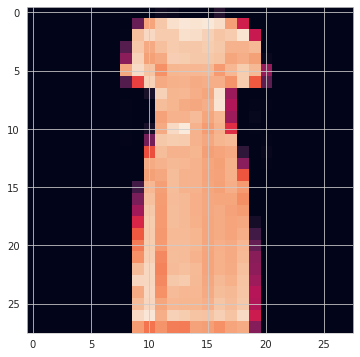

In [10]:
image = x_train[50, :]

plt.imshow(image)
plt.show()

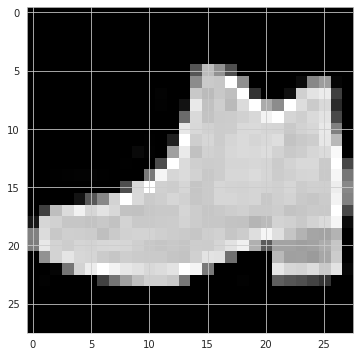

In [11]:
plt.imshow(x_train[15],cmap='gray')

In [12]:
##num_rows, num_cols = 2, 5
##f, ax = plt.subplots(2, 5, figsize=(12,5),
                    ## gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                    ## squeeze=True)

##for r in range(num_rows):
    ##for c in range(num_cols):
      
        ##image_index = r * 5 + c
        ##ax[r,c].axis("off")
       ## ax[r,c].set_title(y_train[image_index])
        ##ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
##plt.tight_layout()
##plt.show()
##plt.close()


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**
---



yukarıda yapmıştım bu işlemi, task2den sebep yerini değiştirmedim

x_train = train_data[:, :] / 255        \
y_train = train_data[:, 0]

x_test = test_data[:, :] / 255         \
y_test = test_data[:, 0]

In [13]:
x_train[9].min()

0.0

In [14]:
x_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [15]:
x_train.shape

## inanır mısınız boyu ve 12 bin tane görüntüyü nerede kaybettim anlayamadım. böyle devam edeceğim.

(60000, 28, 28)

In [16]:
x_train = np.expand_dims(x_train, -1)

In [17]:
x_train[9].shape

(28, 28, 1)

In [18]:
x_test = np.expand_dims(x_test, -1)

In [19]:
print("x_train shape    : ", x_train.shape) 
print("x_test shape     : ", x_test.shape) 

x_train shape    :  (60000, 28, 28, 1)
x_test shape     :  (10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
y_train[9]

5

In [28]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [35]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.3933 - accuracy: 0.8598 - val_loss: 0.3215 - val_accuracy: 0.8852
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9048 - val_loss: 0.2738 - val_accuracy: 0.8985
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2223 - accuracy: 0.9172 - val_loss: 0.2666 - val_accuracy: 0.9025
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1882 - accuracy: 0.9314 - val_loss: 0.2546 - val_accuracy: 0.9081
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1609 - accuracy: 0.9404 - val_loss: 0.2731 - val_accuracy: 0.9078
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1370 - accuracy: 0.9495 - val_loss: 0.2751 - val_accuracy: 0.9142
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1181 - accuracy: 0.9563 - val_loss: 0.2830 - val_accuracy

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
Y_train.shape

(60000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.393,0.860,0.321,0.885
1,0.266,0.905,0.274,0.899
2,0.222,0.917,0.267,0.902
3,0.188,0.931,0.255,0.908
4,0.161,0.940,0.273,0.908


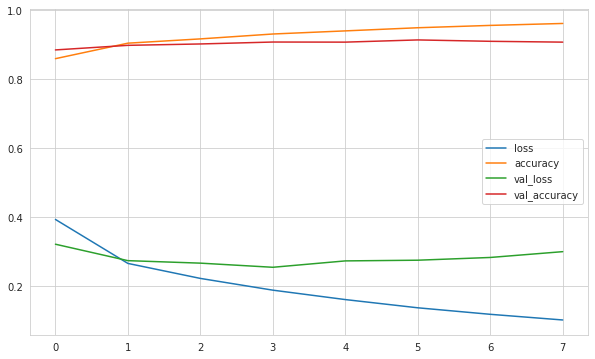

In [39]:
summary.plot();

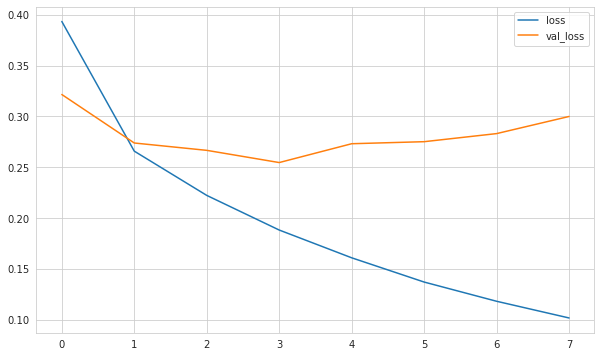

In [40]:
summary[["loss", "val_loss"]].plot();

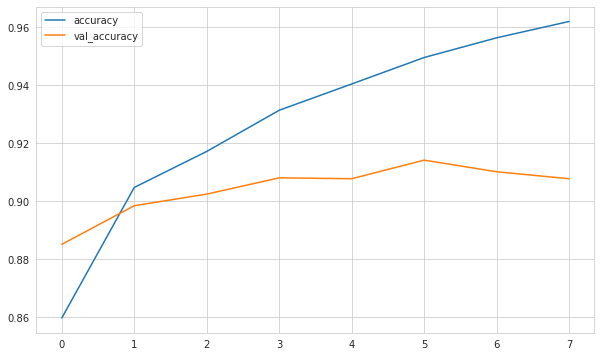

In [41]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [44]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2751 - accuracy: 0.9142


[0.2750840485095978, 0.9142000079154968]

In [46]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2750840485095978
Test accuracy: 0.9142000079154968


## Prediction

In [52]:
prd = x_test[3]

In [53]:
prd.shape

(28, 28, 1)

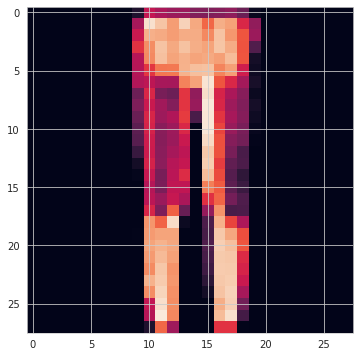

In [54]:
plt.imshow(prd.reshape(28,28));

In [55]:
pred_prob = model.predict(prd.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 36ms/step


array([[1.3182802e-08, 9.9999738e-01, 3.2634251e-10, 2.6563059e-06,
        9.6130215e-10, 2.3618406e-11, 1.3041916e-09, 1.6187969e-11,
        5.8945887e-13, 6.2240846e-10]], dtype=float32)

In [56]:
y_pred = np.argmax(pred_prob)
y_pred

1